In [3]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
print(tf.__version__)

2.3.0


### Data Preparation

In [2]:
# Loads dataset
imdb, info = tfds.load("imdb_reviews", 
                       with_info=True, 
                       as_supervised=True)

In [4]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
  
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())
    
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

### Data Preprocessing

In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# Defines the tokenizer
tokenizer = Tokenizer(num_words = vocab_size, 
                      oov_token=oov_tok)

# Fits the tokenizer
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Tokenizes the train sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
# Pads the train sequences
padded = pad_sequences(sequences,
                       maxlen=max_length, 
                       truncating=trunc_type)

# Tokenizes the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# Pads the test sequences
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length)

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

### Model Architecture

In [13]:
# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiles the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


### Model Fitting

In [15]:
num_epochs = 5

# Fits the model
history = model.fit(padded, 
                    training_labels_final, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, 
                                     testing_labels_final))

Epoch 1/5
782/782 [==============================] - 41s 52ms/step - loss: 0.2307 - accuracy: 0.9117 - val_loss: 0.3858 - val_accuracy: 0.8381
Epoch 2/5
782/782 [==============================] - 42s 54ms/step - loss: 0.1813 - accuracy: 0.9343 - val_loss: 0.4456 - val_accuracy: 0.8331
Epoch 3/5
782/782 [==============================] - 55s 70ms/step - loss: 0.1384 - accuracy: 0.9510 - val_loss: 0.4685 - val_accuracy: 0.8256
Epoch 4/5
782/782 [==============================] - 73s 93ms/step - loss: 0.0990 - accuracy: 0.9655 - val_loss: 0.5881 - val_accuracy: 0.8198
Epoch 5/5
782/782 [==============================] - 79s 101ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 0.6833 - val_accuracy: 0.8095


### Model Evaluation

In [16]:
import matplotlib.pyplot as plt

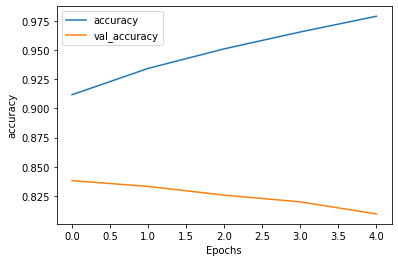

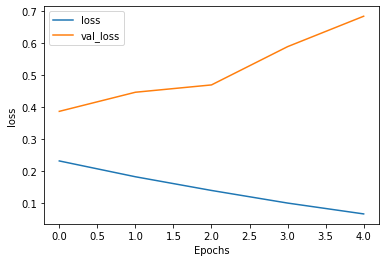

In [17]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Additional Model Definitions

In [ ]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()